In [1]:
#to make the plot in the notebook and not in an extra window
%matplotlib notebook 

import csv
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import pandas as pd

behavior_data_path = '/Users/Nadine/Desktop/behavior_csv/17-08-26L6-behavior-cl.csv'
cell_data_path = '/Users/Nadine/Desktop/a00c_traces/17-08-26L6-A00c-cl.csv'
#cell_filter_pattern = 'A1'
cell_type = 'A00c'
event_name = 'stim'

In [2]:
df_behavior = None
with open(behavior_data_path, 'r') as csvfile:
    df_behavior = pd.read_csv(csvfile, delimiter = ';')

#replace NaN with zero
df_behavior.fillna(0, inplace=True)

print(df_behavior.head())
#print(df_behavior.tail())

   START  END   fw   bw  hunch  stim  turn  other   HP  left turn  right turn
0    153  159  0.0  0.0    0.0   1.0   0.0    0.0  0.0        0.0         0.0
1    160  173  1.0  0.0    0.0   0.0   0.0    0.0  0.0        0.0         0.0
2    191  199  0.0  0.0    0.0   0.0   1.0    0.0  0.0        1.0         0.0
3    207  216  0.0  0.0    0.0   0.0   1.0    0.0  0.0        0.0         1.0
4    217  224  0.0  0.0    0.0   0.0   1.0    0.0  0.0        1.0         0.0


In [3]:
df = None
with open(cell_data_path, 'r') as csvfile:
    df = pd.read_csv(csvfile, delimiter = ',')   
    print(df.head())

       antL      antR      midL      midR     postL     postR
0  0.018995  0.018202  0.028240  0.048549  0.018878 -0.007455
1  0.023874  0.026180  0.024936  0.043420  0.012216 -0.010756
2  0.030906  0.037061  0.038137  0.044372  0.033469  0.003871
3  0.038194  0.033877  0.045834  0.048455  0.033142  0.030480
4  0.048821  0.014507  0.039509  0.044533  0.039575  0.026267


In [4]:
#Overall:single cell, average for different cells and samples, min/max combined with avg, 
#std-dev between different transitions

# combine all handles which are from the same segment
#df[['b', 'c']].iloc[[2,4]].mean(axis=1) # df of column b, c and row 2,4

#T1 = df[['T1', 'T1.1', 'T1.2', 'T1.3']].mean(axis=1)
#T2 = df[['T2', 'T2.1', 'T2.2', 'T2.3']].mean(axis=1)
#T3 = df[['T3', 'T3.1', 'T3.2', 'T3.3']].mean(axis=1)
#A1 = df[['A1', 'A1.1', 'A1.2', 'A1.3']].mean(axis=1)
#A2 = df[['A2', 'A2.1', 'A2.2', 'A2.3']].mean(axis=1)
#A3 = df[['A3', 'A3.1', 'A3.2', 'A3.3']].mean(axis=1)
#A4 = df[['A4', 'A4.1', 'A4.2', 'A4.3']].mean(axis=1)
#A5 = df[['A5', 'A5.1', 'A5.2', 'A5.3']].mean(axis=1)
#A6 = df[['A6', 'A6.1', 'A6.2', 'A6.3']].mean(axis=1)
#A7 = df[['A7', 'A7.1', 'A7.2', 'A7.3']].mean(axis=1)
#A8 = df[['A8', 'A8.1', 'A8.2', 'A8.3']].mean(axis=1)


#T3 = df[['T3', 'T3.1']].mean(axis=1)
#A1 = df[['A1', 'A1.1', 'A1.2']].mean(axis=1)
#A2 = df[['A2', 'A2.1']].mean(axis=1)
#A3 = df[['A3', 'A3.1']].mean(axis=1)
#A4 = df[['A4', 'A4.1']].mean(axis=1)
#A5 = df[['A5', 'A5.1']].mean(axis=1)
#A6 = df[['A6', 'A6.1']].mean(axis=1)
#A7 = df[['A7', 'A7.1', 'A7.2']].mean(axis=1)
#A8 = df[['A8', 'A8.1']].mean(axis=1)




In [5]:
#Cell: min/max, avg

cell_avg = df.mean(axis=1)
cell_min = df.min(axis=1)
cell_max = df.max(axis=1)

#standard deviation (distribution)
cell_std = df.std(axis = 1,)

#standard error of mean
cell_sem = df.sem(axis = 1)

In [6]:
#find column-names according to partially string (partial columnname)
'''
filtered_cells = df.filter(regex=cell_filter_pattern)
if len(filtered_cells.columns) == 0:
    raise ValueError("Could not find cells for filter '{}'".format(cell_filter_pattern))
'''    

'\nfiltered_cells = df.filter(regex=cell_filter_pattern)\nif len(filtered_cells.columns) == 0:\n    raise ValueError("Could not find cells for filter \'{}\'".format(cell_filter_pattern))\n'

<IPython.core.display.Javascript object>


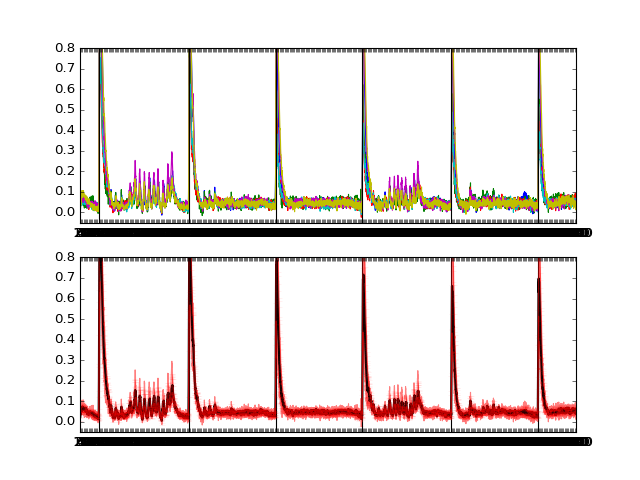

TP of stim = 153.0
TP of stim = 877.0
TP of stim = 1578.0
TP of stim = 2278.0
TP of stim = 2996.0
TP of stim = 3695.0
TP of stim = 4395.0
TP of stim = 5921.0
TP of stim = 6620.0


In [7]:
def add_event_time_points_to_plot(source_df, plot, name):
    for idx, row in source_df.iterrows():
        plot.annotate(name, xy=(row['START'], 1))
        plt.axvline(row['START'], color='k', linestyle='-')
        
def layout_plot(plot, tick_spacing=10, fov=(0, 4001, -0.05, 0.8), legend=False): 
    #set fine x-axis scale
    plot.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    #set x and y limits 
    plot.axis(fov)
    
    plot.legend().set_visible(legend)

event_df = df_behavior[df_behavior.loc[:,event_name] == 1]

fig = plt.figure()

#plot all cells from csv over entire time
sub1 = fig.add_subplot(211)
df.plot(ax=sub1)
add_event_time_points_to_plot(event_df, sub1, event_name)
layout_plot(sub1)

#avg, min, max, std-dev
sub2 = fig.add_subplot(212)
add_event_time_points_to_plot(event_df, sub2, event_name)
cell_avg.plot(ax=sub2, color = 'k', label = cell_type, linewidth=2)
cell_min.plot(ax=sub2, color = 'r', linewidth=1, alpha = 0.5)
cell_max.plot(ax=sub2, color = 'r', linewidth=1, alpha = 0.5)
cell_avg.plot.line(yerr=cell_std, ax=sub2, color = 'r', alpha = 0.1)
#plotting standard error of mean
#cell_avg.plot.line(yerr=h_sem, ax=sub2, color = 'c', alpha = 0.1)
layout_plot(sub2)

for idx, row in event_df.iterrows():
    print('TP of {} ='.format(event_name), row['START'])


In [8]:
#plot for specific time window with stimuli aligned (here frames, later real time!!)
# combine all handles which are from the same segment and stimuli aligned
#df[['b', 'c']].iloc[[2,4]].mean(axis=1) # df of column b, c and row 2,4


left_half_window_size = 100.0
right_half_window_size = 100.0

# As long as we use frame/index numbers for slicing,
# we need to generate an explicit frame number, which
# can be done by materializing the index as column.
cell_avg_df = pd.DataFrame({'data': cell_avg.values, 'time': cell_avg.index}) #average of handle


#Collect windows surrounding individual events
#event_df defined in pargraph before
windows = []
for i,row in event_df.iterrows():
    window_start = row['START'] - left_half_window_size
    window_end = row['START'] + right_half_window_size
    # Get subset of rows between window_start and window_end
    # in time column and extract only the data column.
    event = cell_avg_df[(cell_avg_df.time >= window_start) & (cell_avg_df.time <= window_end)].filter(items=['data'])
    # Reset index so that each window 'starts' at the same time
    # and becomes comparable, don't include index as column
    event.reset_index(inplace=True, drop=True)
    # Get rid of time column, it's not needed for averaging
    windows.append(event)
    print(windows)
# Merge all windows into a single data frame
aligned_windows = None
for event_window in windows:
    if aligned_windows is None:
        aligned_windows = event_window
    else:
        aligned_windows = pd.merge(aligned_windows, event_window, left_index = True, right_index = True)
#avg
stim_all_avg = aligned_windows.mean(axis=1)

#standard deviation
stim_all_std = aligned_windows.std(axis = 1,)

[         data
0    0.049016
1    0.047025
2    0.051469
3    0.045209
4    0.050312
5    0.049954
6    0.035779
7    0.046824
8    0.049321
9    0.038979
10   0.038326
11   0.042490
12   0.046506
13   0.038670
14   0.037563
15   0.044303
16   0.042233
17   0.049832
18   0.033536
19   0.041760
20   0.046259
21   0.047287
22   0.041826
23   0.038332
24   0.044746
25   0.045546
26   0.043948
27   0.043807
28   0.044528
29   0.047441
..        ...
171  0.129118
172  0.126377
173  0.128308
174  0.131899
175  0.114941
176  0.118134
177  0.108775
178  0.113838
179  0.120067
180  0.096049
181  0.093199
182  0.094333
183  0.091049
184  0.085723
185  0.071990
186  0.078920
187  0.074518
188  0.067380
189  0.068763
190  0.043978
191  0.055698
192  0.055114
193  0.048163
194  0.053763
195  0.061023
196  0.067166
197  0.078003
198  0.080464
199  0.074039
200  0.058623

[201 rows x 1 columns]]
[         data
0    0.049016
1    0.047025
2    0.051469
3    0.045209
4    0.050312
5    0.049954
6    0.

<IPython.core.display.Javascript object>


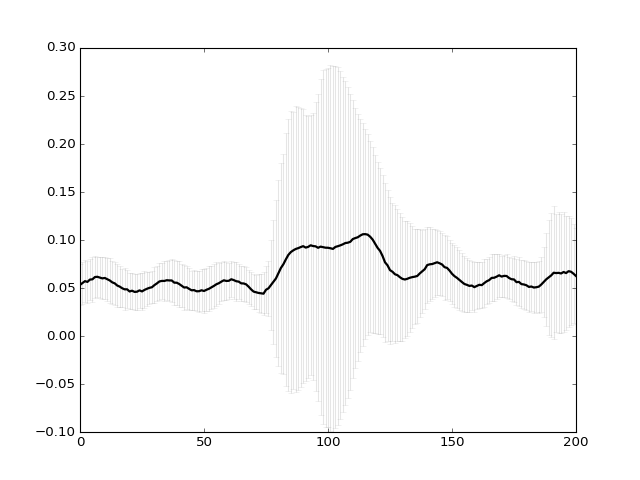

In [44]:
fig = plt.figure()
ax  = fig.add_subplot(111)

#plot aligned events
stim_all_avg.plot(ax =ax, color = 'k', linewidth=2)

stim_all_avg.plot.line(yerr=stim_all_std, ax=ax, color = 'k', alpha = 0.1)



#set fine x-axis scale
tick_spacing = 50
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
 

In [ ]:
#confident interval (for different sample to see the significance)